# **CLIMATE CHANGE DATA ANALYSIS(EDA)**

# Q1) Detecting and Imputing NULL Values

## 0) Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/content/climate_distortion_with_region.csv')

## 1) Understanding the Data

In [ ]:
df.shape

(10000, 15)

In [ ]:
df.head()

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001-01-15,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024-01-15,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001-01-15,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001-01-15,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998-01-15,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df.sample(4)

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
5317,1991-01-15,USA,West,Rice,31.27,2994.24,21.16,2.169,5,64.33,9.39,76.31,55.66,Water Management,442.38
4806,2006-01-15,Nigeria,North West,Fruits,26.60,229.57,14.03,2.322,10,15.78,34.32,28.86,83.96,Drought-resistant Crops,753.94
6944,1995-01-15,Brazil,North,Vegetables,-3.21,1079.85,1.83,2.120,1,37.37,3.56,79.76,33.36,Organic Farming,770.34
840,1990-01-15,China,South,Coffee,26.88,726.56,10.86,3.730,3,77.07,43.01,0.74,61.30,Drought-resistant Crops,951.99


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            9991 non-null   float64
 13  Adaptation_Strate

In [ ]:
df.describe()

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9991.000000,10000.000000
mean,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.895228,674.269658
std,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.197590,414.591431
min,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.215000,350.545000
50%,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.465000,917.505000
max,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [ ]:
df.columns

Index(['Date', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

## 2) Data Cleaning

### 0) Handling Inconsistent Data

In [ ]:
df.rename(columns={'Irrigation_Access_%': 'Irrigation_Access_Perc'}, inplace=True)


In [ ]:
df.columns

Index(['Date', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_Perc',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']

for i in categorical_cols:
    print(f"Unique values in {i}:")
    print(df[i].value_counts())
    print("\n")


Unique values in Country:
Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64


Unique values in Region:
Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu                    249
Northwest   

There is no correcting typos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_Perc       10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            9991 non-null   float64
 13  Adaptation_Strate

Lets convert the date column into date_time_stamp

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         10000 non-null  datetime64[ns]
 1   Country                      10000 non-null  object        
 2   Region                       10000 non-null  object        
 3   Crop_Type                    10000 non-null  object        
 4   Average_Temperature_C        10000 non-null  float64       
 5   Total_Precipitation_mm       10000 non-null  float64       
 6   CO2_Emissions_MT             10000 non-null  float64       
 7   Crop_Yield_MT_per_HA         10000 non-null  float64       
 8   Extreme_Weather_Events       10000 non-null  int64         
 9   Irrigation_Access_Perc       10000 non-null  float64       
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64       
 11  Fertilizer_Use_KG_per_HA     10000 non-nul

### 1)Handling Missing Data

In [ ]:
df.isnull().sum()

,0
Date,0
Country,0
Region,0
Crop_Type,0
Average_Temperature_C,0
Total_Precipitation_mm,0
CO2_Emissions_MT,0
Crop_Yield_MT_per_HA,0
Extreme_Weather_Events,0
Irrigation_Access_Perc,0


#### **Found Null values in two columns namely : Soil_health_index and Adaptation_strategies**

#### Filling(Imputing) Null Values in Soil_health_index Column

In [ ]:
df.columns

Index(['Date', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_Perc',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numeric_cols].corr()

soil_health_correlation = correlation_matrix['Soil_Health_Index'].sort_values(ascending=False)

soil_health_correlation


,Soil_Health_Index
Soil_Health_Index,1.000000
Extreme_Weather_Events,0.016619
Pesticide_Use_KG_per_HA,0.012661
CO2_Emissions_MT,0.004491
Irrigation_Access_Perc,0.001660
Fertilizer_Use_KG_per_HA,-0.000078
Economic_Impact_Million_USD,-0.000690
Crop_Yield_MT_per_HA,-0.006147
Average_Temperature_C,-0.010874
Total_Precipitation_mm,-0.021343


I attempted to fill the null values in the 'Soil_Health_Index' using other numerical columns, but none showed a strong correlation with it. The highest correlation coefficient was only 0.016619, indicating a weak relationship with 'Extreme_Weather_Events'. Therefore, I need to explore alternative methods for imputing these null values.

In [ ]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']

# ANOVA

for col in categorical_cols:

    model = ols(f'Soil_Health_Index ~ C({col})', data=df).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"ANOVA results for {col}:")
    print(anova_table)
    print("\n")


ANOVA results for Country:
                  sum_sq      df        F    PR(>F)
C(Country)  3.130281e+03     9.0  0.85248  0.567502
Residual    4.072217e+06  9981.0      NaN       NaN


ANOVA results for Region:
                 sum_sq      df         F   PR(>F)
C(Region)  1.320159e+04    33.0  0.980585  0.49894
Residual   4.062145e+06  9957.0       NaN      NaN


ANOVA results for Crop_Type:
                    sum_sq      df         F    PR(>F)
C(Crop_Type)  8.835114e+02     9.0  0.240477  0.988585
Residual      4.074463e+06  9981.0       NaN       NaN


ANOVA results for Adaptation_Strategies:
                                sum_sq      df        F    PR(>F)
C(Adaptation_Strategies)  4.607144e+02     4.0  0.28214  0.889707
Residual                  4.072520e+06  9976.0      NaN       NaN




Since there is no significant relationship between Soil_Health_Index and the categorical variables, it’s best to use a simple method like the mean, median imputation for filling missing values in Soil_Health_Index.

<Axes: ylabel='Frequency'>

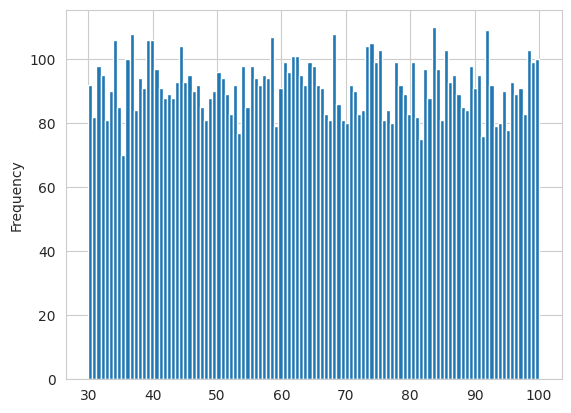

In [ ]:
df['Soil_Health_Index'].plot(kind='hist',bins=109)

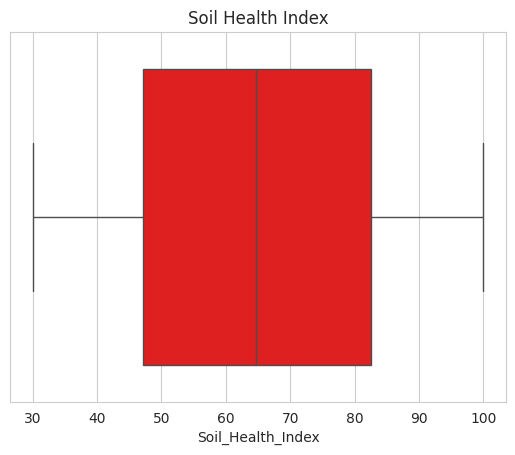

In [ ]:
sns.boxplot(df['Soil_Health_Index'], color='red', orient='h')
plt.title('Soil Health Index')
plt.show()

All the values in the 'Soil_Health_Index' range from 30 to 100, and there are no significant outliers seen from the box plot.


In [ ]:
df['Soil_Health_Index'].describe()

,Soil_Health_Index
count,9991.000000
mean,64.895228
std,20.197590
min,30.000000
25%,47.215000
50%,64.650000
75%,82.465000
max,100.000000



Given that the mean and median are nearly the same and there are no significant outliers influencing the mean, I will replace the null values in the 'Soil_Health_Index' with the column's mean.

In [ ]:
df['Soil_Health_Index'].fillna(df['Soil_Health_Index'].mean(), inplace=True)

In [ ]:
df['Soil_Health_Index'].isnull().sum()

0

#### Filling Null Values in Adaptation_Strategies Column

#### Finding the association between the category variable (Adaptation_Strategies) and other numerical variables using an ANOVA (Analysis of Variance).

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

numerical_columns = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
                     'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_Perc',
                     'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
                     'Economic_Impact_Million_USD']

for col in numerical_columns:
    model = ols(f'{col} ~ C(Adaptation_Strategies)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA results for {col}:")
    print(anova_table)
    print("\n")


ANOVA results for Average_Temperature_C:
                                sum_sq      df         F    PR(>F)
C(Adaptation_Strategies)  6.905708e+02     4.0  1.312922  0.262515
Residual                  1.312715e+06  9983.0       NaN       NaN


ANOVA results for Total_Precipitation_mm:
                                sum_sq      df         F    PR(>F)
C(Adaptation_Strategies)  1.060311e+06     4.0  0.408806  0.802442
Residual                  6.473169e+09  9983.0       NaN       NaN


ANOVA results for CO2_Emissions_MT:
                                 sum_sq      df         F    PR(>F)
C(Adaptation_Strategies)     254.812008     4.0  0.863165  0.485152
Residual                  736762.073474  9983.0       NaN       NaN


ANOVA results for Crop_Yield_MT_per_HA:
                               sum_sq      df        F    PR(>F)
C(Adaptation_Strategies)     3.999118     4.0  1.00366  0.404083
Residual                  9944.399823  9983.0      NaN       NaN


ANOVA results for Extreme_Weathe

The ANOVA results indicate no significant relationships between the numerical variables and 'Adaptation_Strategies' (all p-values > 0.05). Therefore, I will proceed with Chi-Square tests for the categorical variables and 'Adaptation_Strategies'.

In [ ]:
from scipy.stats import chi2_contingency

categorical_columns = ['Country', 'Region', 'Crop_Type']

# Loop through each categorical column and perform Chi-Square test
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Adaptation_Strategies'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square test results for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")
    print("\n")


Chi-Square test results for Country:
Chi2: 31.28549963618169, p-value: 0.6922875957124544


Chi-Square test results for Region:
Chi2: 132.9327229174569, p-value: 0.4608503102278389


Chi-Square test results for Crop_Type:
Chi2: 45.07778288961292, p-value: 0.1426867047798106




Since all of the categorical variables (Country, Region, and Crop_Type) have p-values greater than 0.05, the Chi-Square test findings indicate that none of them significantly relate to the target variable. Since no significant relationship has been found, I will use the mode, or most frequent value, of the data to fill in the null values in the respective columns.


In [ ]:
df['Adaptation_Strategies'].value_counts()

,count
Adaptation_Strategies,
Water Management,2046
No Adaptation,2020
Drought-resistant Crops,1994
Organic Farming,1974
Crop Rotation,1954


In [ ]:
df['Adaptation_Strategies'].mode()[0]

'Water Management'

In [ ]:
df['Adaptation_Strategies'].fillna(df['Adaptation_Strategies'].mode()[0], inplace=True)

In [ ]:
df['Adaptation_Strategies'].isnull().sum()

0

### 2) Handling Duplicates

In [ ]:
df.duplicated().sum()

0

No duplicates were Found


### 3) Handling Outliers

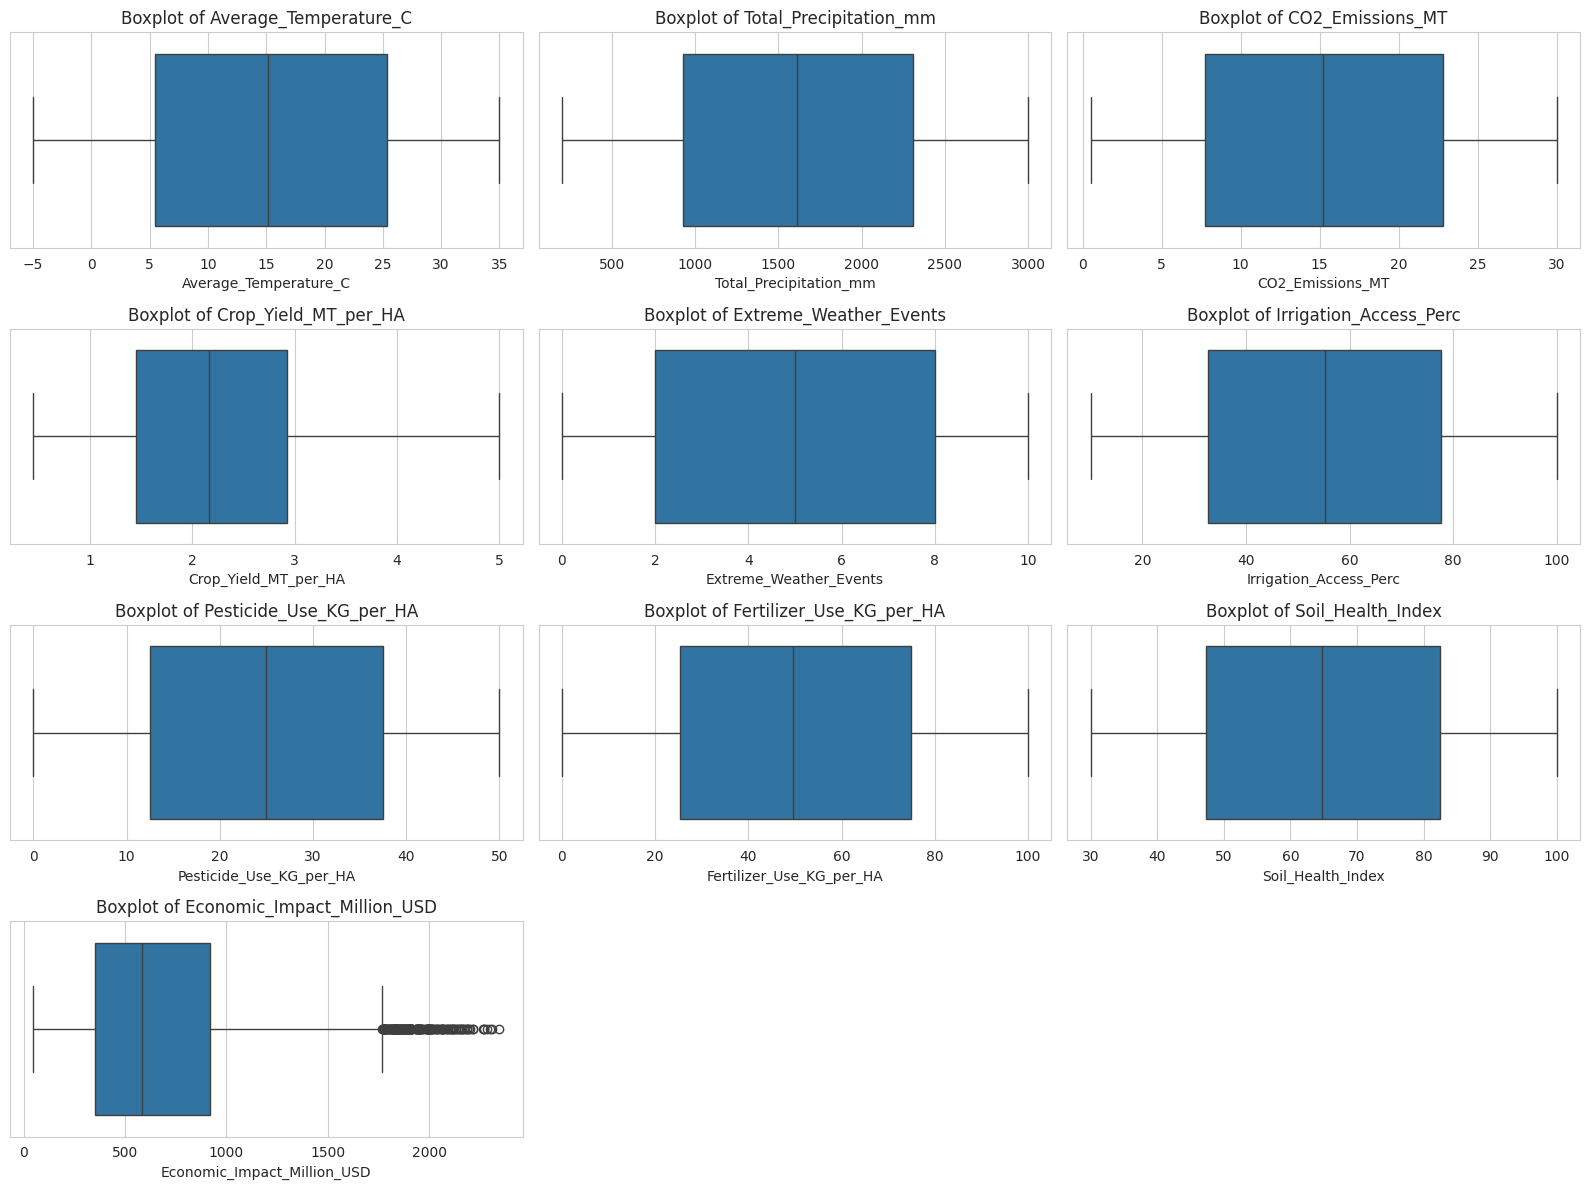

In [ ]:
# Select numerical columns
numerical_cols = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
                  'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_Perc',
                  'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
                  'Economic_Impact_Million_USD']

# Set the plot size
plt.figure(figsize=(16, 12))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

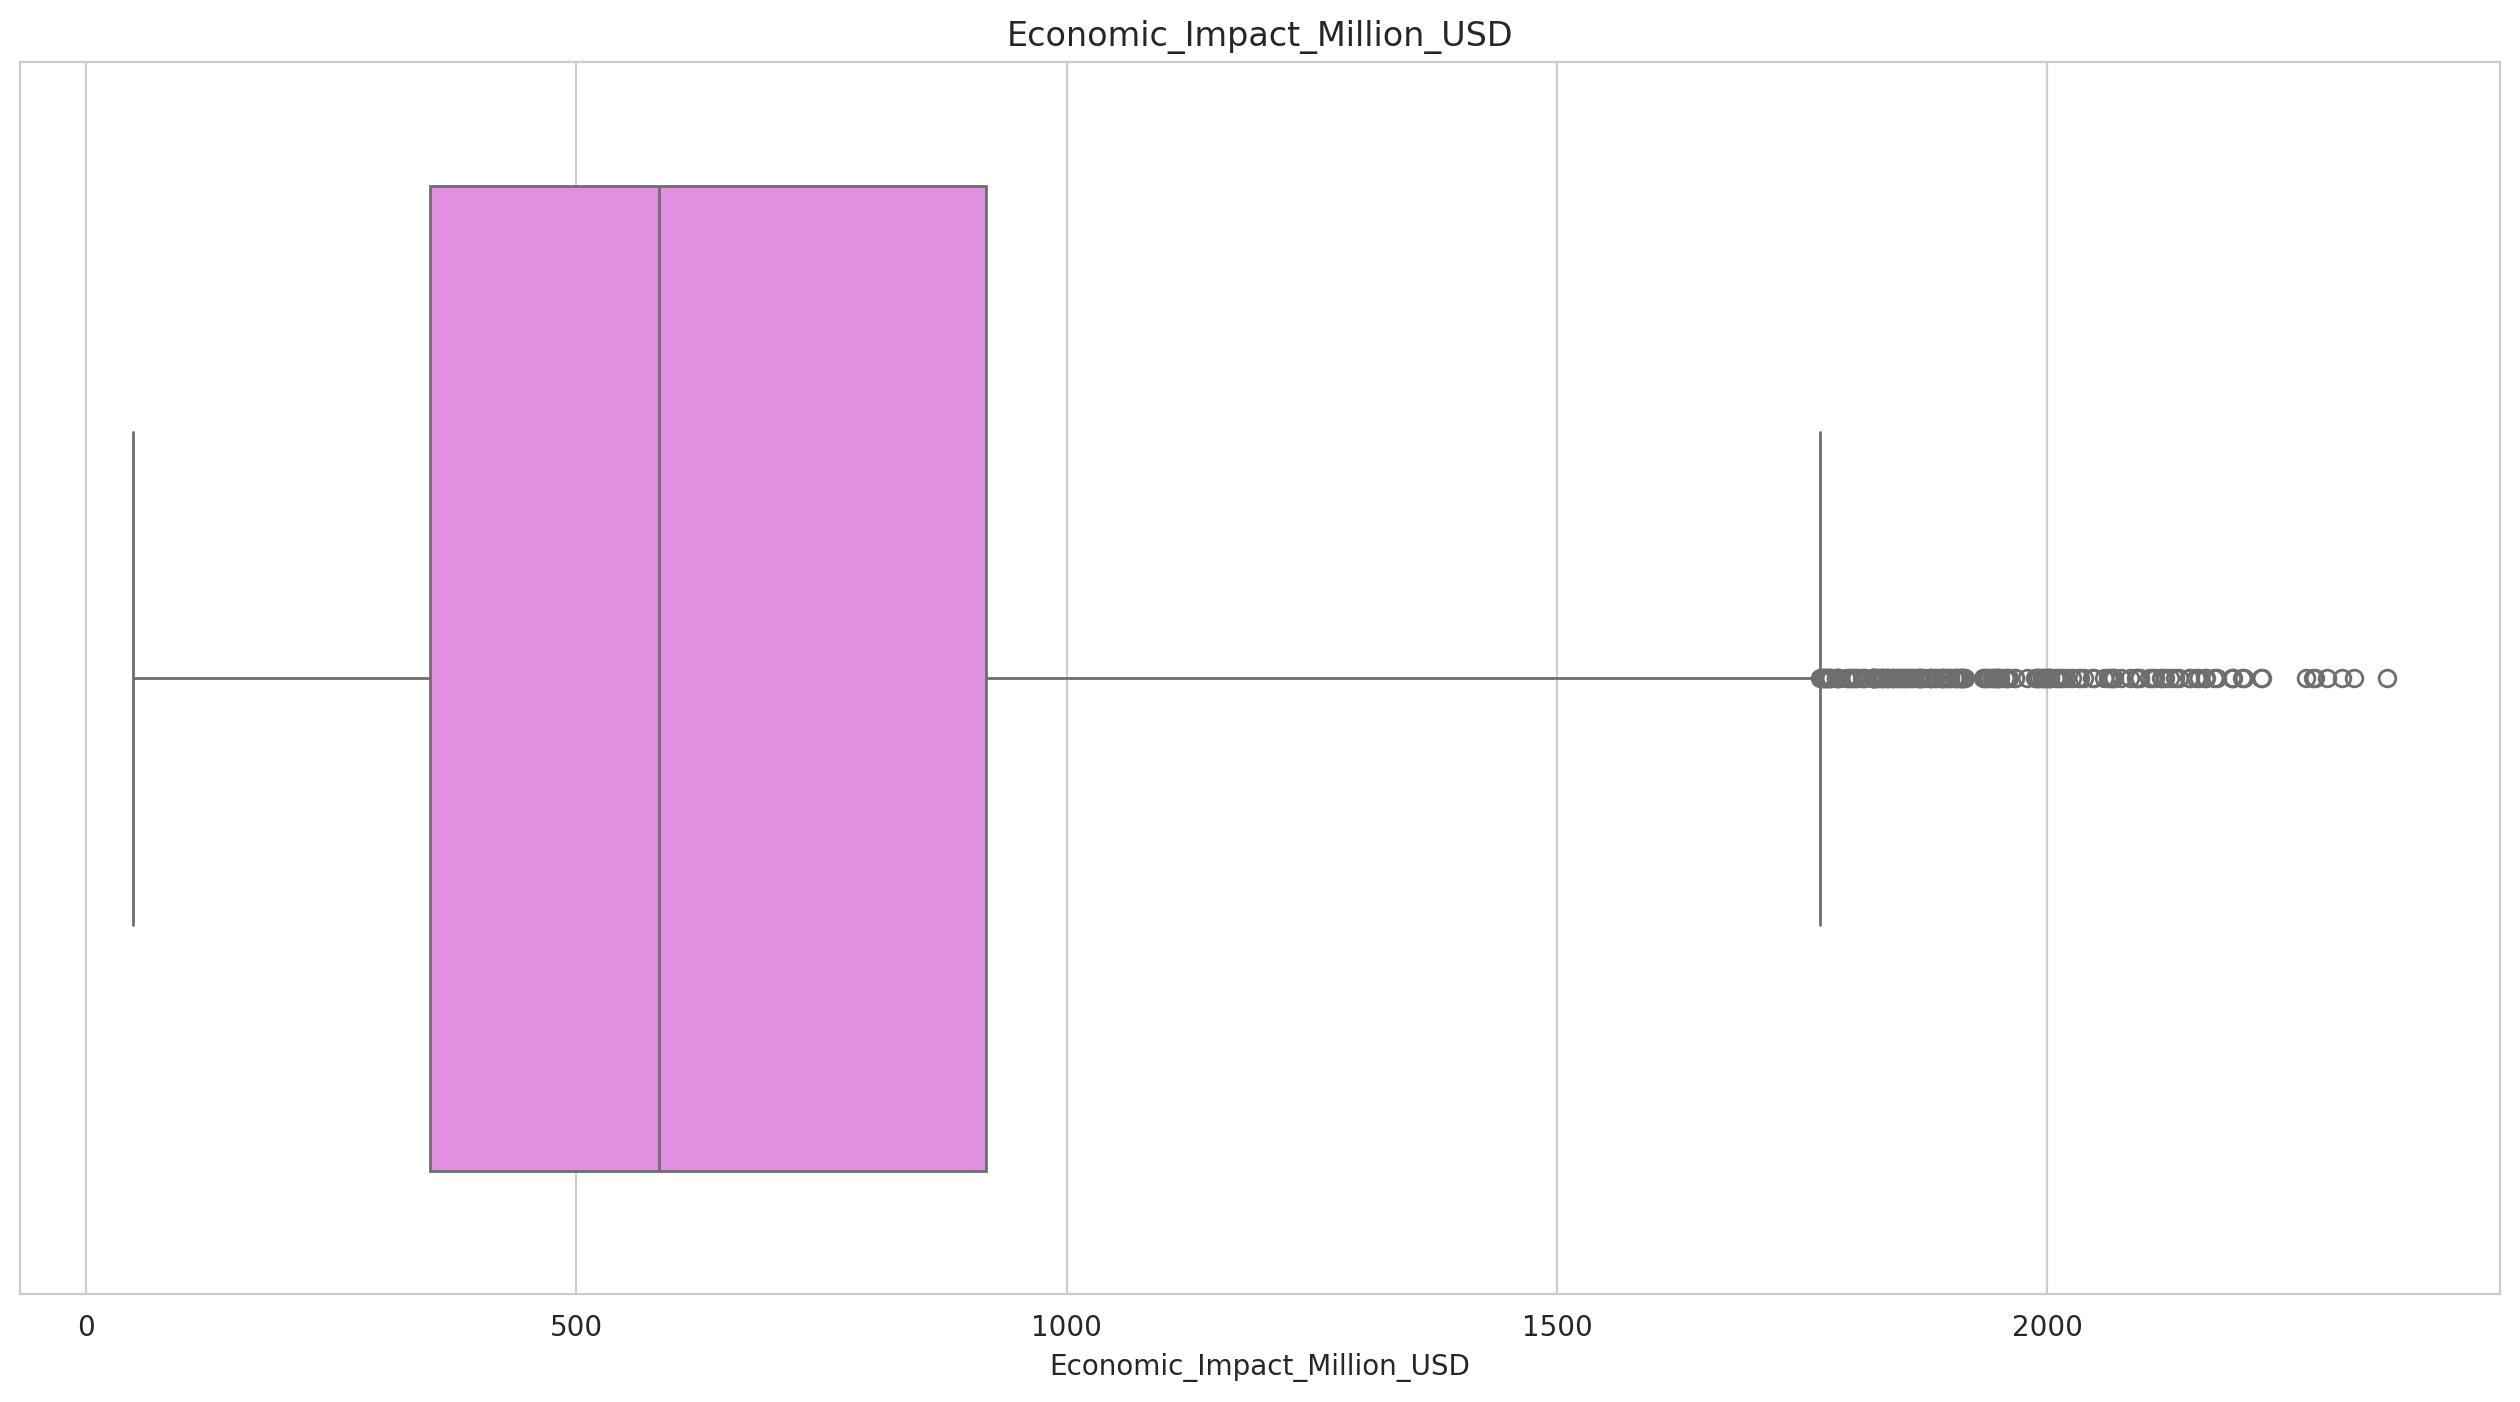

In [ ]:
plt.figure(figsize=(16, 8),dpi=200)
sns.boxplot(df['Economic_Impact_Million_USD'], color='violet', orient='h')
plt.title('Economic_Impact_Million_USD')
plt.show()

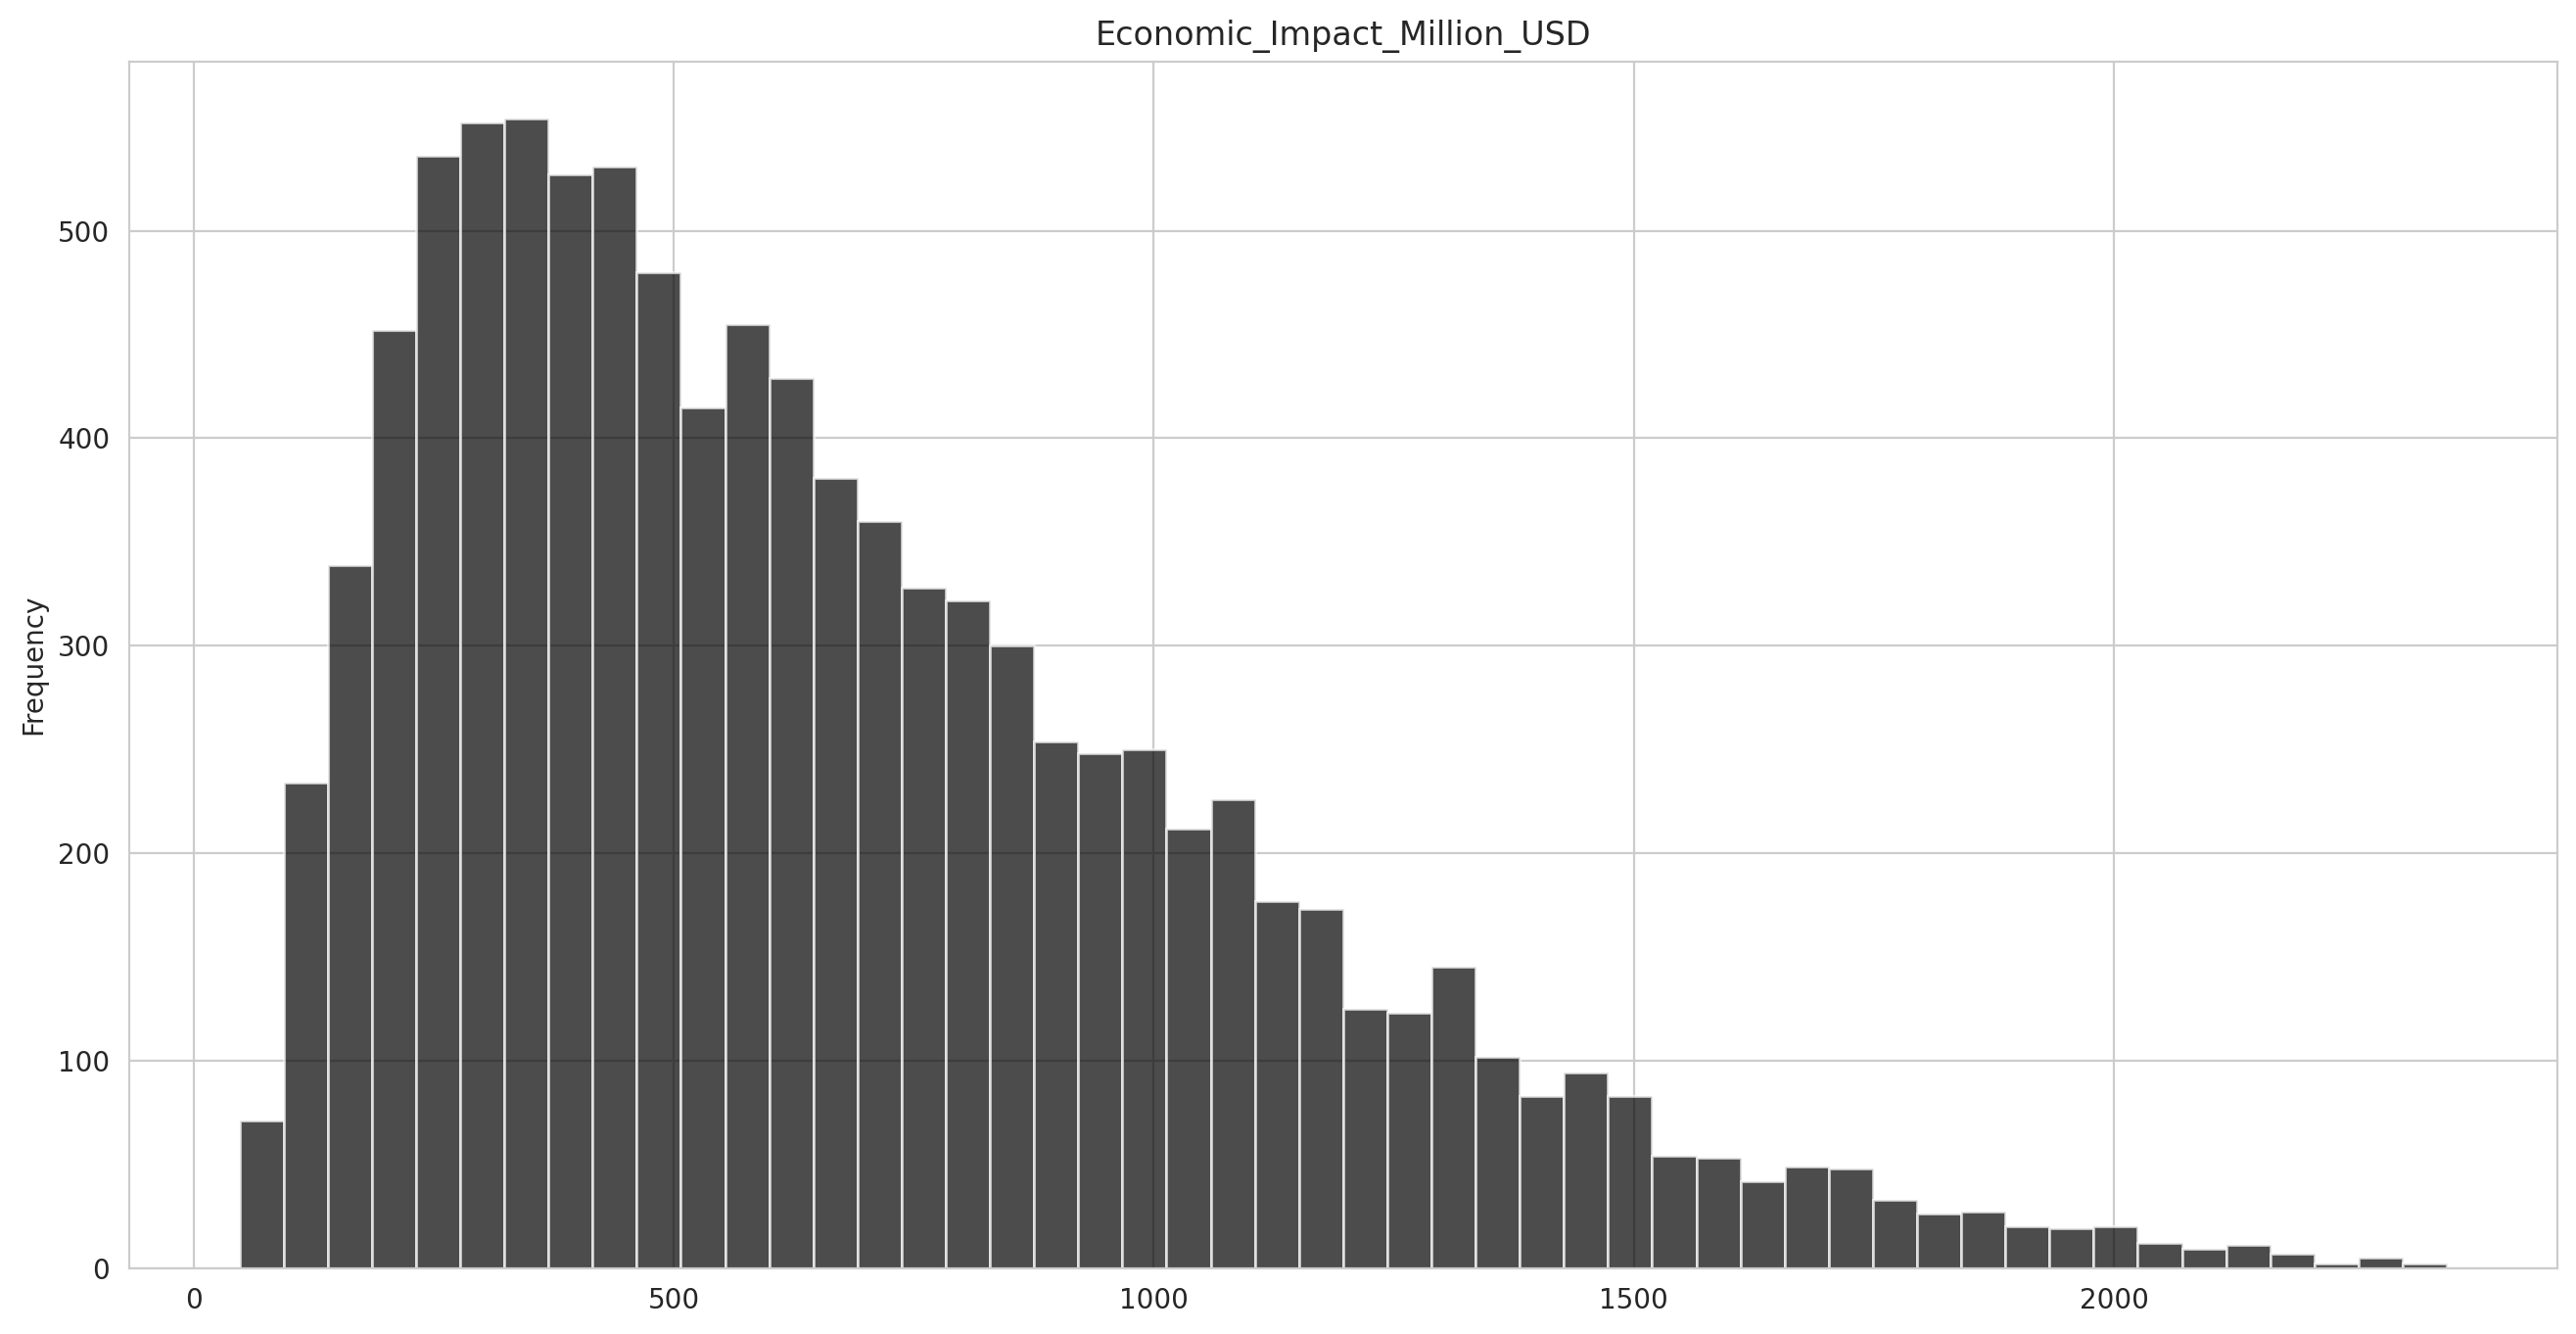

In [ ]:
plt.figure(figsize=(16, 8),dpi=200)
df['Economic_Impact_Million_USD'].plot(kind='hist',bins=50, color='Black', alpha=0.7)
plt.title('Economic_Impact_Million_USD')
plt.show()

Can see outliers in 'Economic_impact_million_USD' Column.

2) Removing Outliers in 'Economic_impact_million_USD' Column

In [ ]:
df['Economic_Impact_Million_USD'].describe()

,Economic_Impact_Million_USD
count,10000.000000
mean,674.269658
std,414.591431
min,47.840000
25%,350.545000
50%,583.920000
75%,917.505000
max,2346.470000


Will fill the outliers using IQR method

In [ ]:
q1 = df['Economic_Impact_Million_USD'].quantile(0.25)
q3 = df['Economic_Impact_Million_USD'].quantile(0.75)
iqr = q3 - q1

In [ ]:
print(f'Q1 : {q1}')
print(f'Q3 : {q3}')
print(f'IQR: {iqr}')

Q1 : 350.545
Q3 : 917.505
IQR: 566.96


In [ ]:
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

In [ ]:
print(f'Lower Bound : {lower_bound}')
print(f'Upper Bound : {upper_bound}')

Lower Bound : -783.375
Upper Bound : 2051.425




1. We will be losing more date when we use 1.5
(lower_bound = q1 - 2 * iqr,
upper_bound = q3 + 2 * iqr)
. So i used 2


2. Neglecting the Lower bound because the minimun values of the column is far greater then the lower bound value.





Removing outliers greater than the Upper bound

In [ ]:
df = df[df['Economic_Impact_Million_USD'] <= upper_bound]

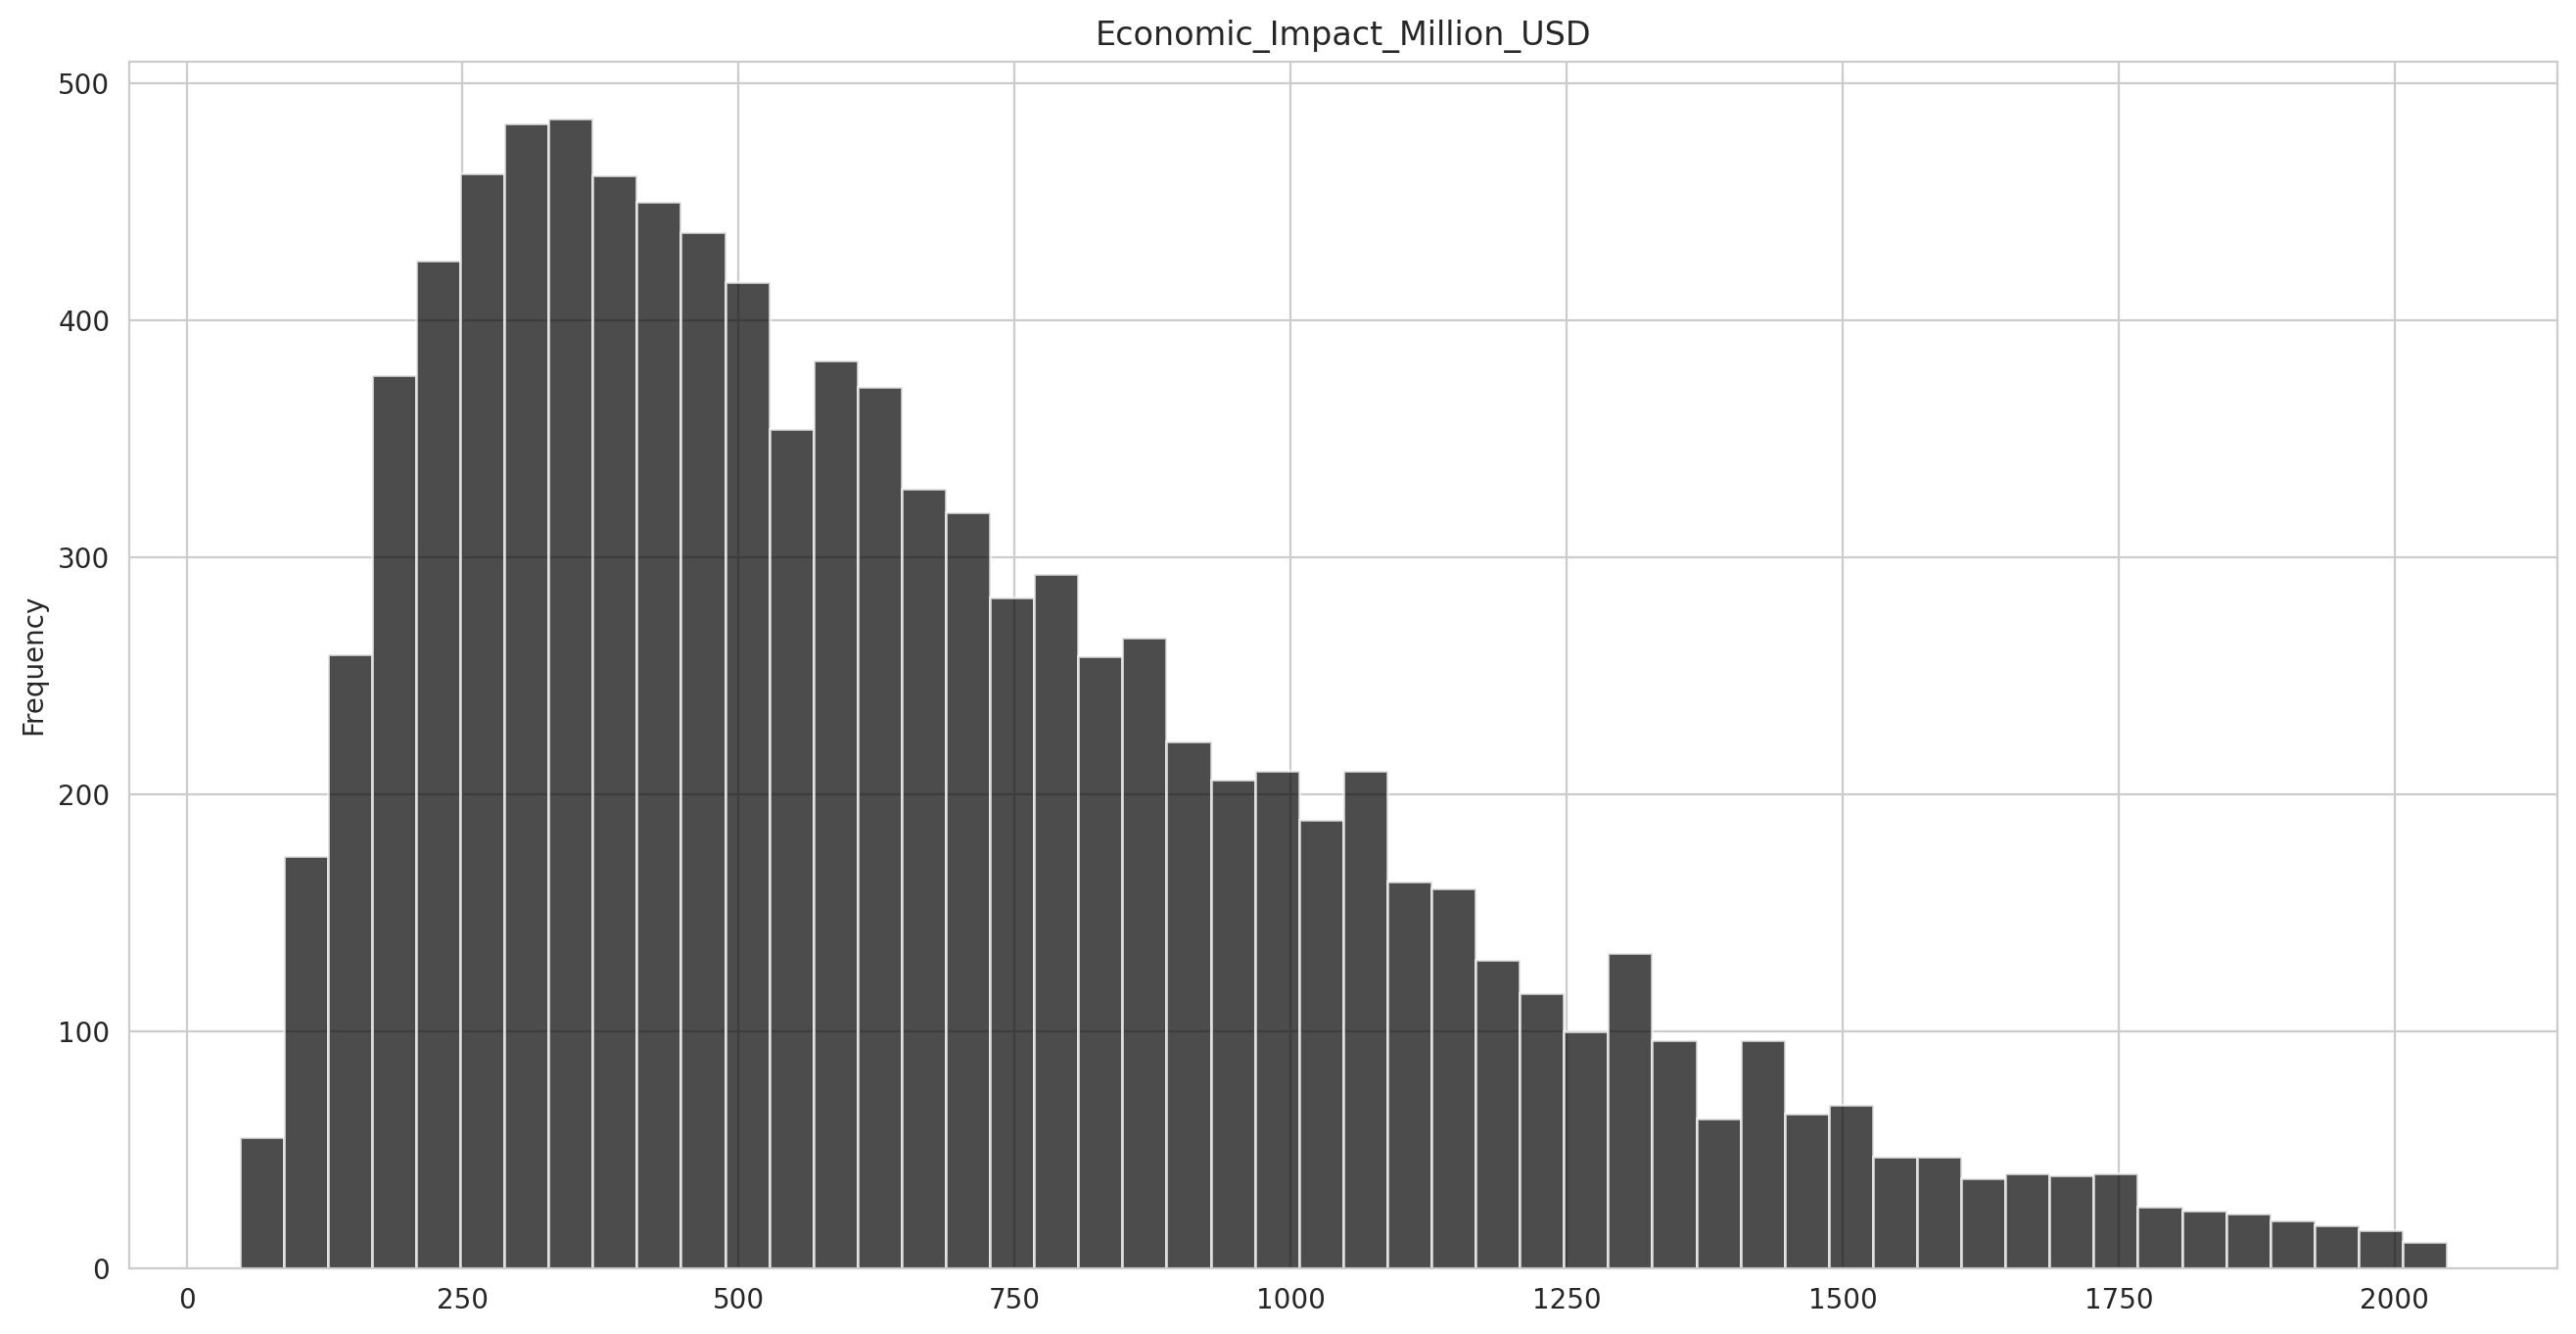

In [ ]:
plt.figure(figsize=(16, 8),dpi=200)
df['Economic_Impact_Million_USD'].plot(kind='hist',bins=50, color='Black', alpha=0.7)
plt.title('Economic_Impact_Million_USD')
plt.show()

In [ ]:
df['Economic_Impact_Million_USD'].describe()

,Economic_Impact_Million_USD
count,9958.000000
mean,668.016206
std,404.073129
min,47.840000
25%,349.835000
50%,581.275000
75%,911.947500
max,2047.210000


In [ ]:
q95 = df['Economic_Impact_Million_USD'].quantile(0.95)
print(f'Q95 : {q95}')

Q95 : 1462.1354999999996


# Q2) Unique Regions for Canada

In [ ]:
canada_regions = df[df['Country'] == 'Canada']['Region'].nunique()
print("Number of Unique Regions in Canada:")
print(canada_regions)

Number of Unique Regions in Canada:
4


In [ ]:
df[['Country', 'Region']][df['Country']=='Canada'].value_counts()

Country  Region          
Canada   Ontario             268
         Prairies            243
         British Columbia    242
         Quebec              230
Name: count, dtype: int64

# Q3) CO2 Emissions in 2023

In [ ]:
df.head()

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_Perc,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001-01-15,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024-01-15,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001-01-15,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001-01-15,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998-01-15,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df['CO2_Emissions_MT'].describe()

,CO2_Emissions_MT
count,9958.000000
mean,15.262319
std,8.591088
min,0.500000
25%,7.772500
50%,15.230000
75%,22.840000
max,30.000000


In [ ]:
df_2023=df[df['Date'].dt.year==2023]


In [ ]:

# Group by Country and sum CO2 emissions
co2_by_country = data_2023.groupby('Country')['CO2_Emissions_MT'].sum().reset_index()

# Find the country with the most and least CO2 emissions
max_co2 = co2_by_country.loc[co2_by_country['CO2_Emissions_MT'].idxmax()]
min_co2 = co2_by_country.loc[co2_by_country['CO2_Emissions_MT'].idxmin()]

In [ ]:
co2_emissions_by_country = df_2023.groupby('Country')['CO2_Emissions_MT'].sum().reset_index().sort_values(by='CO2_Emissions_MT', ascending=False)
co2_emissions_by_country

,Country,CO2_Emissions_MT
6,India,542.09
7,Nigeria,499.99
5,France,491.78
3,Canada,480.91
2,Brazil,438.08
4,China,430.50
0,Argentina,407.33
8,Russia,406.57
1,Australia,404.74
9,USA,359.43


In [ ]:
most_co2_emissions = co2_emissions_by_country.loc[co2_emissions_by_country['CO2_Emissions_MT'].idxmax()]
least_co2_emissions = co2_emissions_by_country.loc[co2_emissions_by_country['CO2_Emissions_MT'].idxmin()]

In [ ]:
print(f"The country with the most CO2 emissions in 2023 is {most_co2_emissions['Country']} with {most_co2_emissions['CO2_Emissions_MT']} metric tons of CO2.")

The country with the most CO2 emissions in 2023 is India with 542.09 metric tons of CO2.


In [ ]:
print(f"The country with the least CO2 emissions in 2023 is {least_co2_emissions['Country']} with {least_co2_emissions['CO2_Emissions_MT']} metric tons of CO2.")

The country with the least CO2 emissions in 2023 is USA with 359.43 metric tons of CO2.


<ipython-input-568-95f67e8498ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='CO2_Emissions_MT', data=co2_emissions_by_country, palette='viridis')


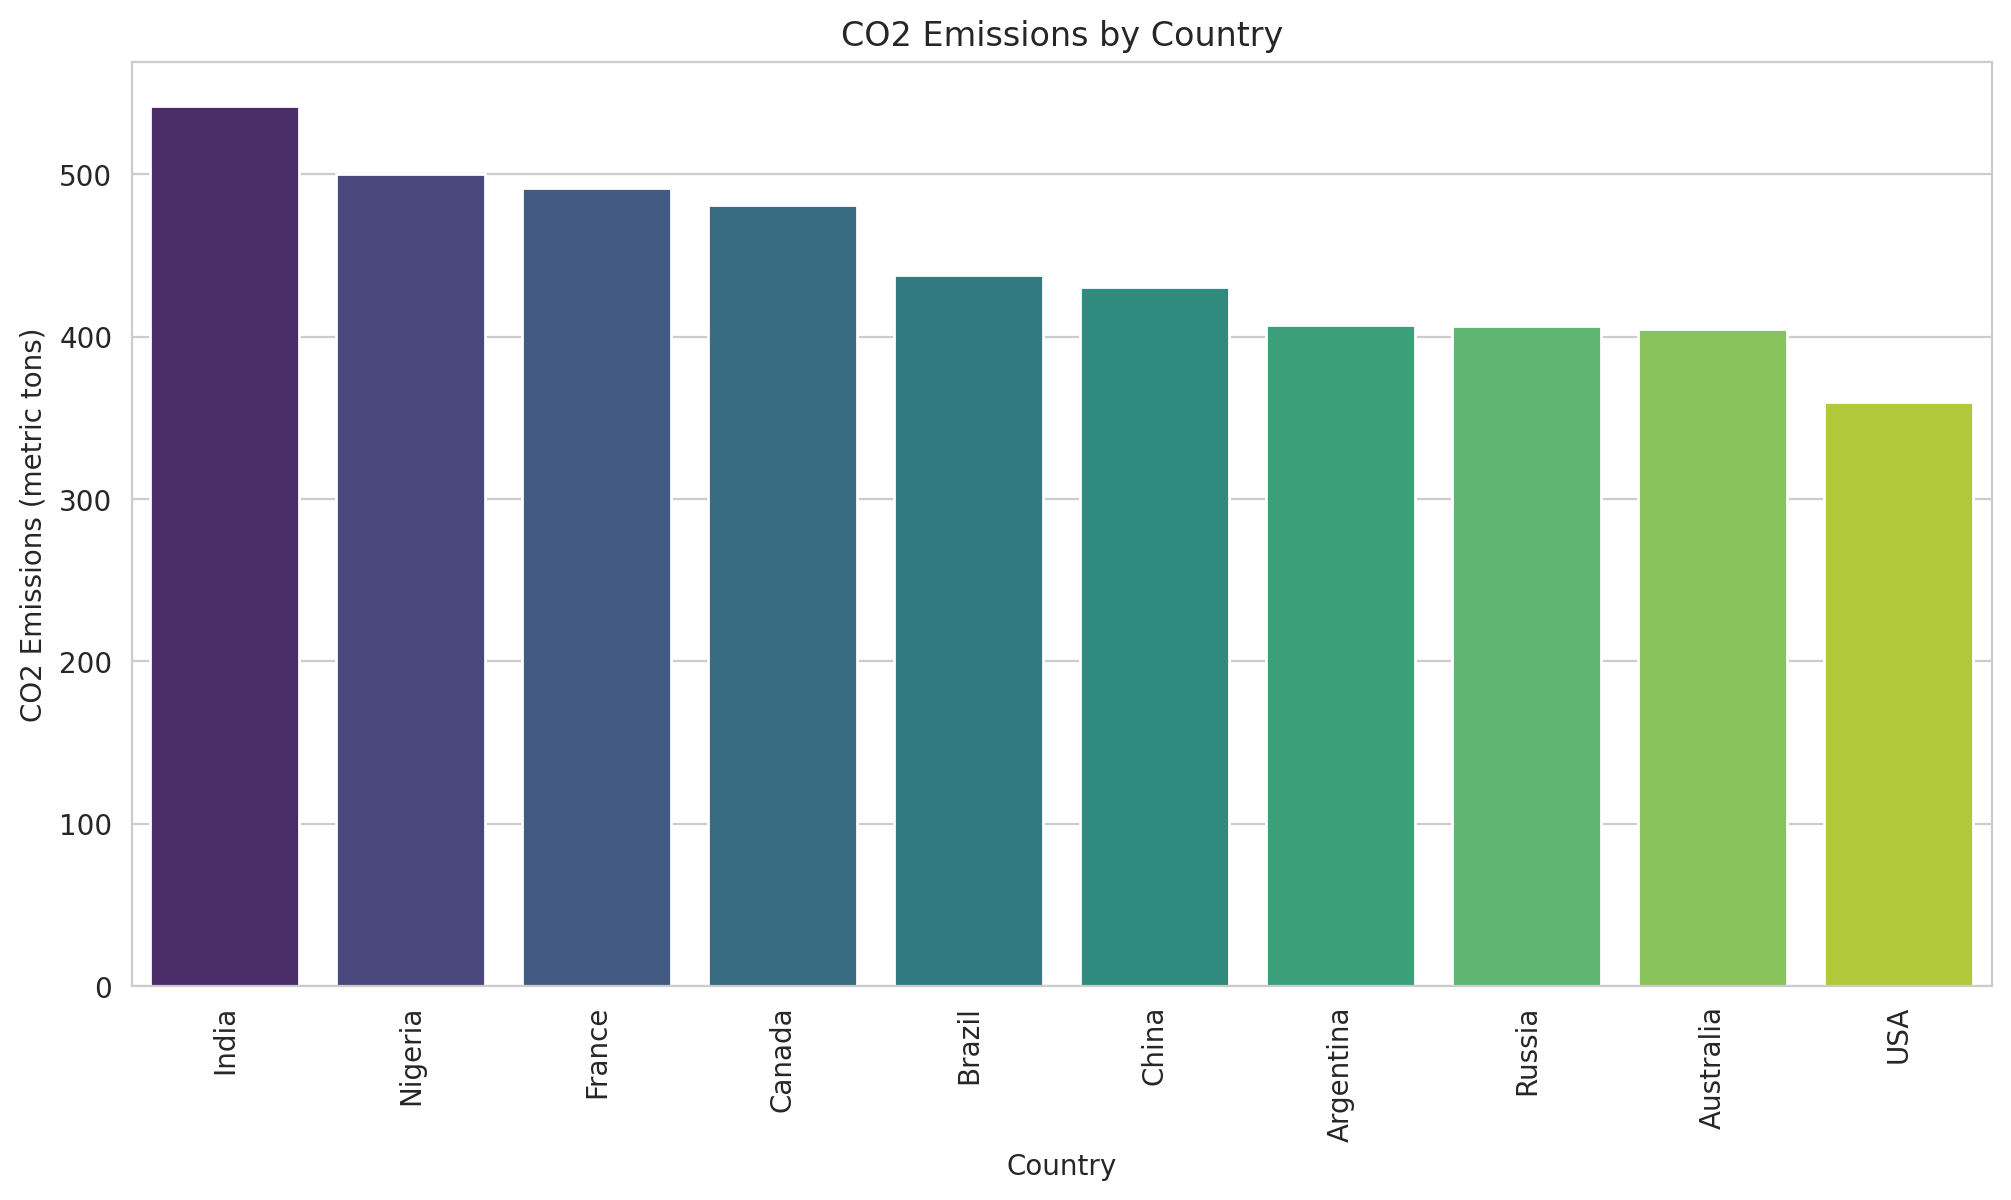

In [ ]:
plt.figure(figsize=(12, 6),dpi=200)
sns.set_style("whitegrid")
sns.barplot(x='Country', y='CO2_Emissions_MT', data=co2_emissions_by_country, palette='viridis')
plt.title('CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (metric tons)')
plt.xticks(rotation=90)
plt.show()

# Q4) Coolest Region in the USA

In [ ]:
df['Average_Temperature_C'].describe()

,Average_Temperature_C
count,9958.000000
mean,15.241641
std,11.489669
min,-4.990000
25%,5.390000
50%,15.170000
75%,25.360000
max,35.000000


In [ ]:
df_usa = df[df['Country']=='USA']

In [ ]:
df_usa['Average_Temperature_C'].describe()

,Average_Temperature_C
count,1027.000000
mean,15.683574
std,11.626098
min,-4.980000
25%,5.725000
50%,15.620000
75%,25.990000
max,34.980000


In [ ]:
df_usa['Region'].unique()

array(['Midwest', 'Northeast', 'South', 'West'], dtype=object)

In [ ]:
df_usa['Region'].value_counts()

,count
Region,
South,262
Northeast,259
West,255
Midwest,251


In [ ]:
df_usa[df_usa['Region']=='South'].head(5)

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_Perc,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
25,1996-01-15,USA,South,Soybeans,27.73,1673.81,26.56,3.285,1,88.61,29.11,27.82,96.40,No Adaptation,1492.19
45,2024-01-15,USA,South,Wheat,12.18,1647.58,19.10,1.872,8,36.61,43.15,22.46,52.18,Water Management,925.79
118,1997-01-15,USA,South,Coffee,34.07,1965.45,20.34,2.853,9,49.77,29.93,1.12,49.98,Drought-resistant Crops,642.36
128,2000-01-15,USA,South,Vegetables,23.61,1287.10,17.00,1.476,7,64.45,49.46,29.43,52.68,Crop Rotation,329.19
198,2004-01-15,USA,South,Vegetables,-4.37,2292.03,29.68,2.583,2,13.27,22.33,52.30,97.11,No Adaptation,878.12


In [ ]:
df_usa_region_temp = df_usa.groupby('Region')['Average_Temperature_C'].mean()
df_usa_region_temp

,Average_Temperature_C
Region,
Midwest,16.606335
Northeast,15.517452
South,15.378702
West,15.257255


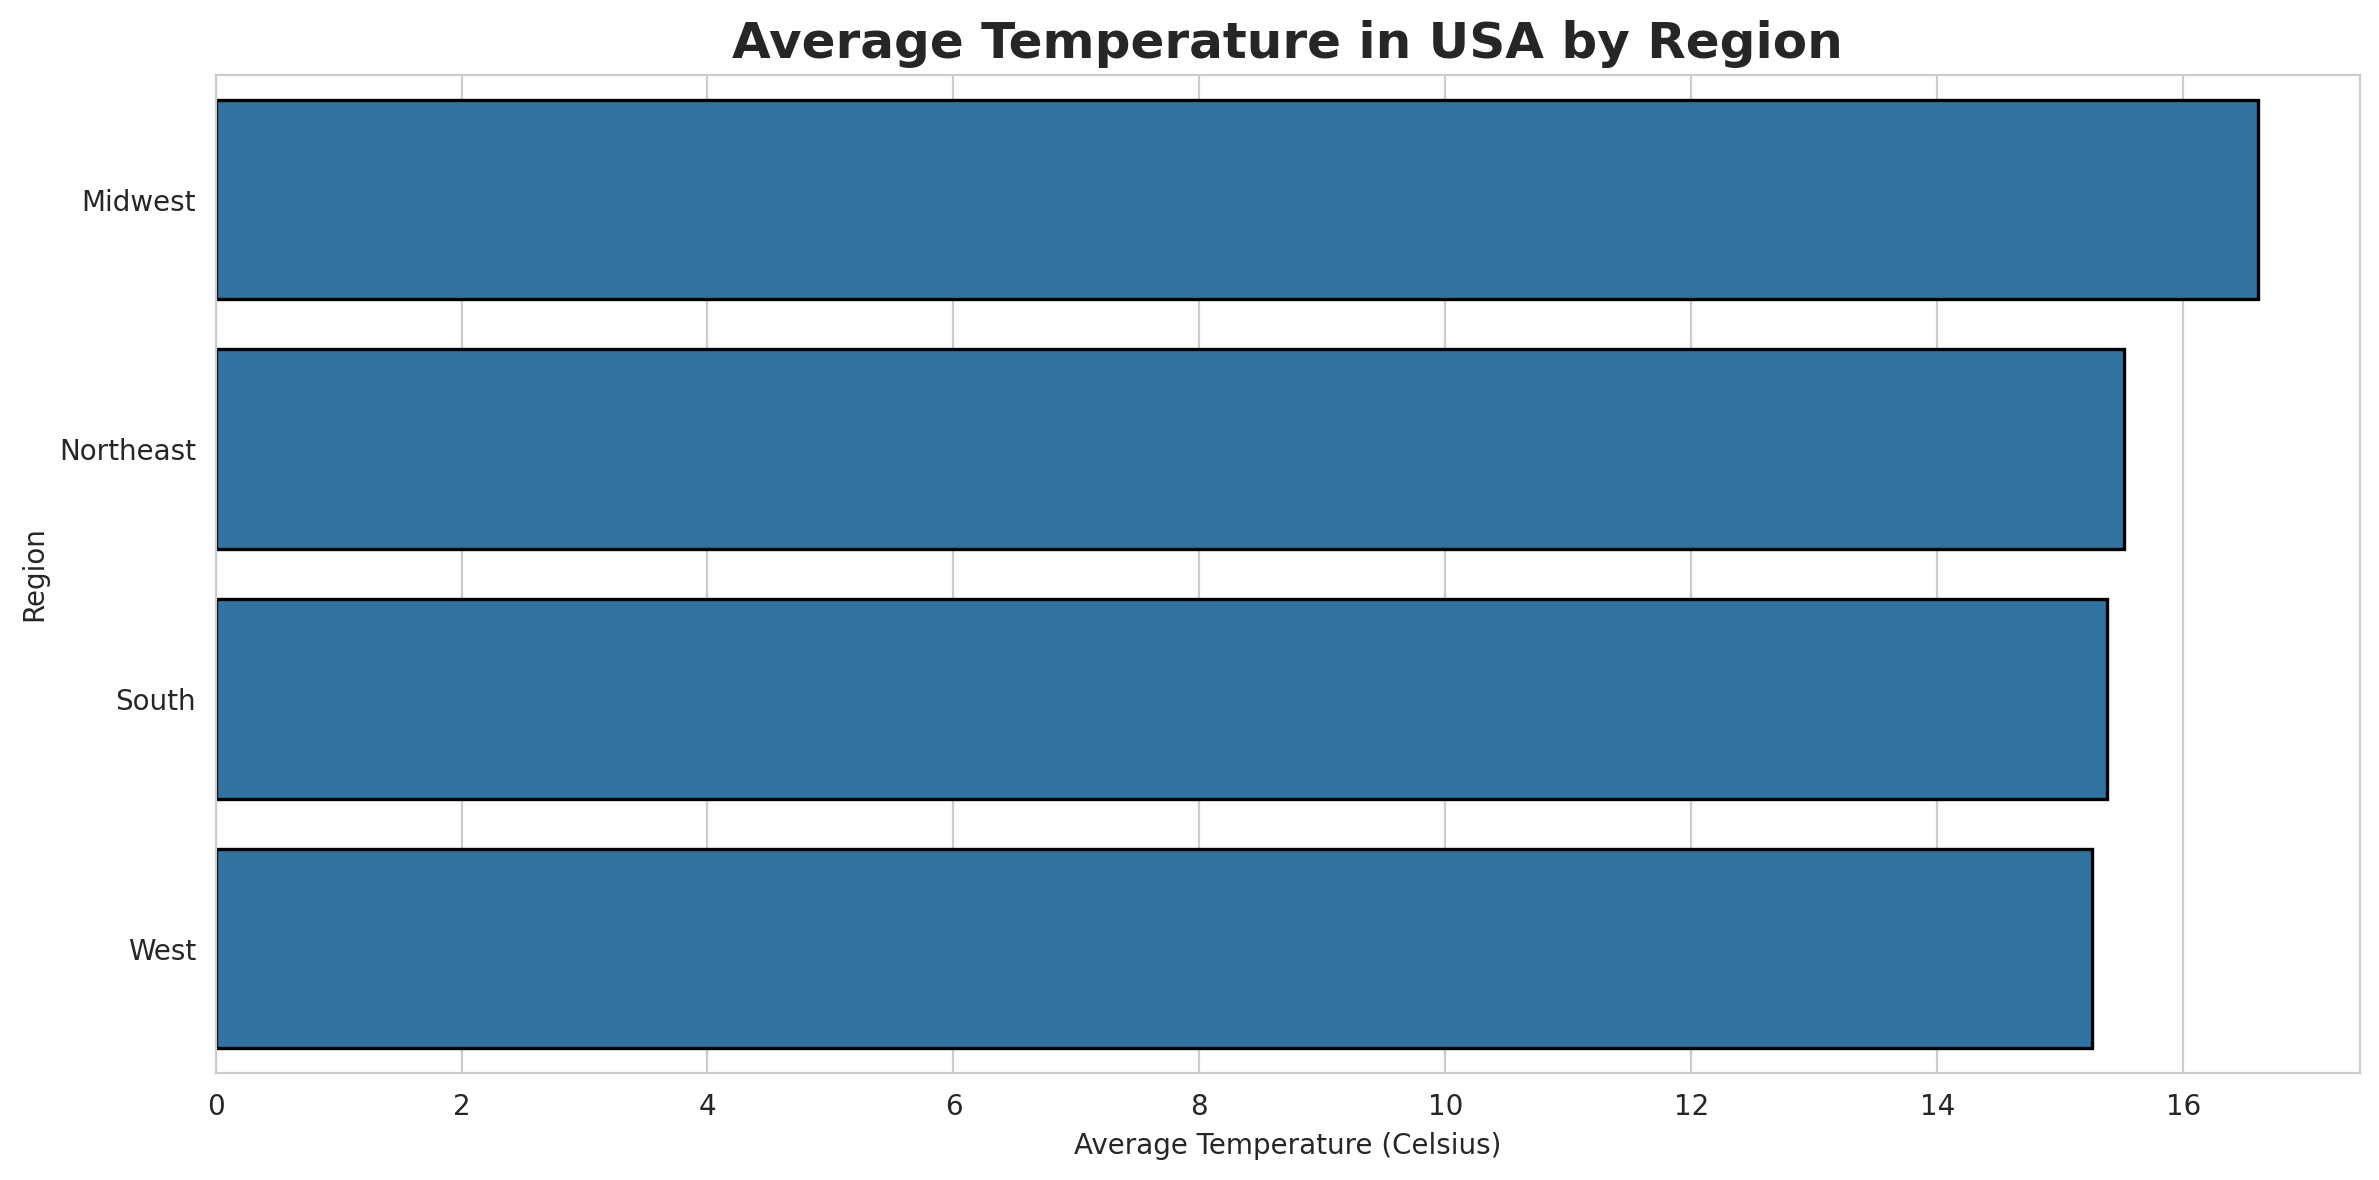

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=200)

sns.barplot(x=df_usa_region_temp.values, y=df_usa_region_temp.index, edgecolor='black', linewidth=1.2)

plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Region')
plt.title('Average Temperature in USA by Region', fontdict={'fontsize': 18,'fontweight': 'bold'})
plt.tight_layout()
plt.show()


In [ ]:
a= df_usa_region_temp.idxmin()

In [ ]:
print(f'The Region with the lowest Average Temperature(Coolest_region) in USA is {a}')

The Region with the lowest Average Temperature(Coolest_region) in USA is West


# Q5) Crop Type with Highest Economic Impact in the Midwest

In [ ]:
df_usa.head(10)

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_Perc,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
5,2019-01-15,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
13,2003-01-15,USA,Northeast,Barley,14.70,2272.28,11.45,2.500,9,57.37,19.48,46.13,77.32,Drought-resistant Crops,1126.27
25,1996-01-15,USA,South,Soybeans,27.73,1673.81,26.56,3.285,1,88.61,29.11,27.82,96.40,No Adaptation,1492.19
45,2024-01-15,USA,South,Wheat,12.18,1647.58,19.10,1.872,8,36.61,43.15,22.46,52.18,Water Management,925.79
60,2023-01-15,USA,Northeast,Cotton,30.62,1630.22,29.28,3.249,9,70.31,5.80,49.85,31.92,Crop Rotation,509.77
63,2021-01-15,USA,Northeast,Fruits,23.30,1740.68,25.99,0.747,10,44.50,4.74,20.44,60.39,No Adaptation,372.06
66,2011-01-15,USA,West,Corn,15.76,2317.59,21.33,3.807,0,94.85,47.02,35.76,48.60,Drought-resistant Crops,1627.44
70,2019-01-15,USA,Northeast,Vegetables,24.62,1342.63,27.04,2.628,0,15.98,9.00,49.51,81.09,No Adaptation,548.31
91,1993-01-15,USA,West,Rice,18.05,391.16,18.64,3.960,5,91.05,3.76,99.89,37.87,Crop Rotation,1009.71
118,1997-01-15,USA,South,Coffee,34.07,1965.45,20.34,2.853,9,49.77,29.93,1.12,49.98,Drought-resistant Crops,642.36


In [ ]:
df_usa_midwest = df_usa[df_usa['Region']=='Midwest']

In [ ]:
df_usa_midwest.head()

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_Perc,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
5,2019-01-15,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,5,52.45,26.06,71.56,97.32,Water Management,353.16
124,2012-01-15,USA,Midwest,Vegetables,-3.77,698.50,27.68,1.206,2,69.03,14.97,9.47,80.00,No Adaptation,268.11
132,1994-01-15,USA,Midwest,Vegetables,13.55,2895.80,1.50,3.550,6,94.31,48.76,23.63,74.06,Water Management,1316.20
165,2013-01-15,USA,Midwest,Corn,5.74,2114.15,13.19,2.940,9,31.08,13.41,31.29,86.23,Drought-resistant Crops,413.76
178,2005-01-15,USA,Midwest,Fruits,17.33,1339.45,9.85,3.450,0,97.49,44.92,81.19,36.40,No Adaptation,1185.31


In [ ]:
df_usa_midwest.Crop_Type.unique()

array(['Coffee', 'Vegetables', 'Corn', 'Fruits', 'Wheat', 'Soybeans',
       'Barley', 'Sugarcane', 'Rice', 'Cotton'], dtype=object)

In [ ]:
df_usa_midwest.Crop_Type.value_counts()

,count
Crop_Type,
Coffee,35
Wheat,33
Vegetables,31
Barley,28
Rice,23
Corn,21
Fruits,21
Cotton,21
Soybeans,20


In [ ]:
df_usa_midwest_highest_impact = df_usa_midwest.groupby('Crop_Type')['Economic_Impact_Million_USD'].sum().sort_values(ascending=False)
df_usa_midwest_highest_impact

,Economic_Impact_Million_USD
Crop_Type,
Coffee,21970.56
Wheat,21299.82
Vegetables,19198.26
Barley,16768.63
Soybeans,14577.64
Rice,13830.13
Cotton,13666.43
Corn,13540.37
Fruits,12842.23


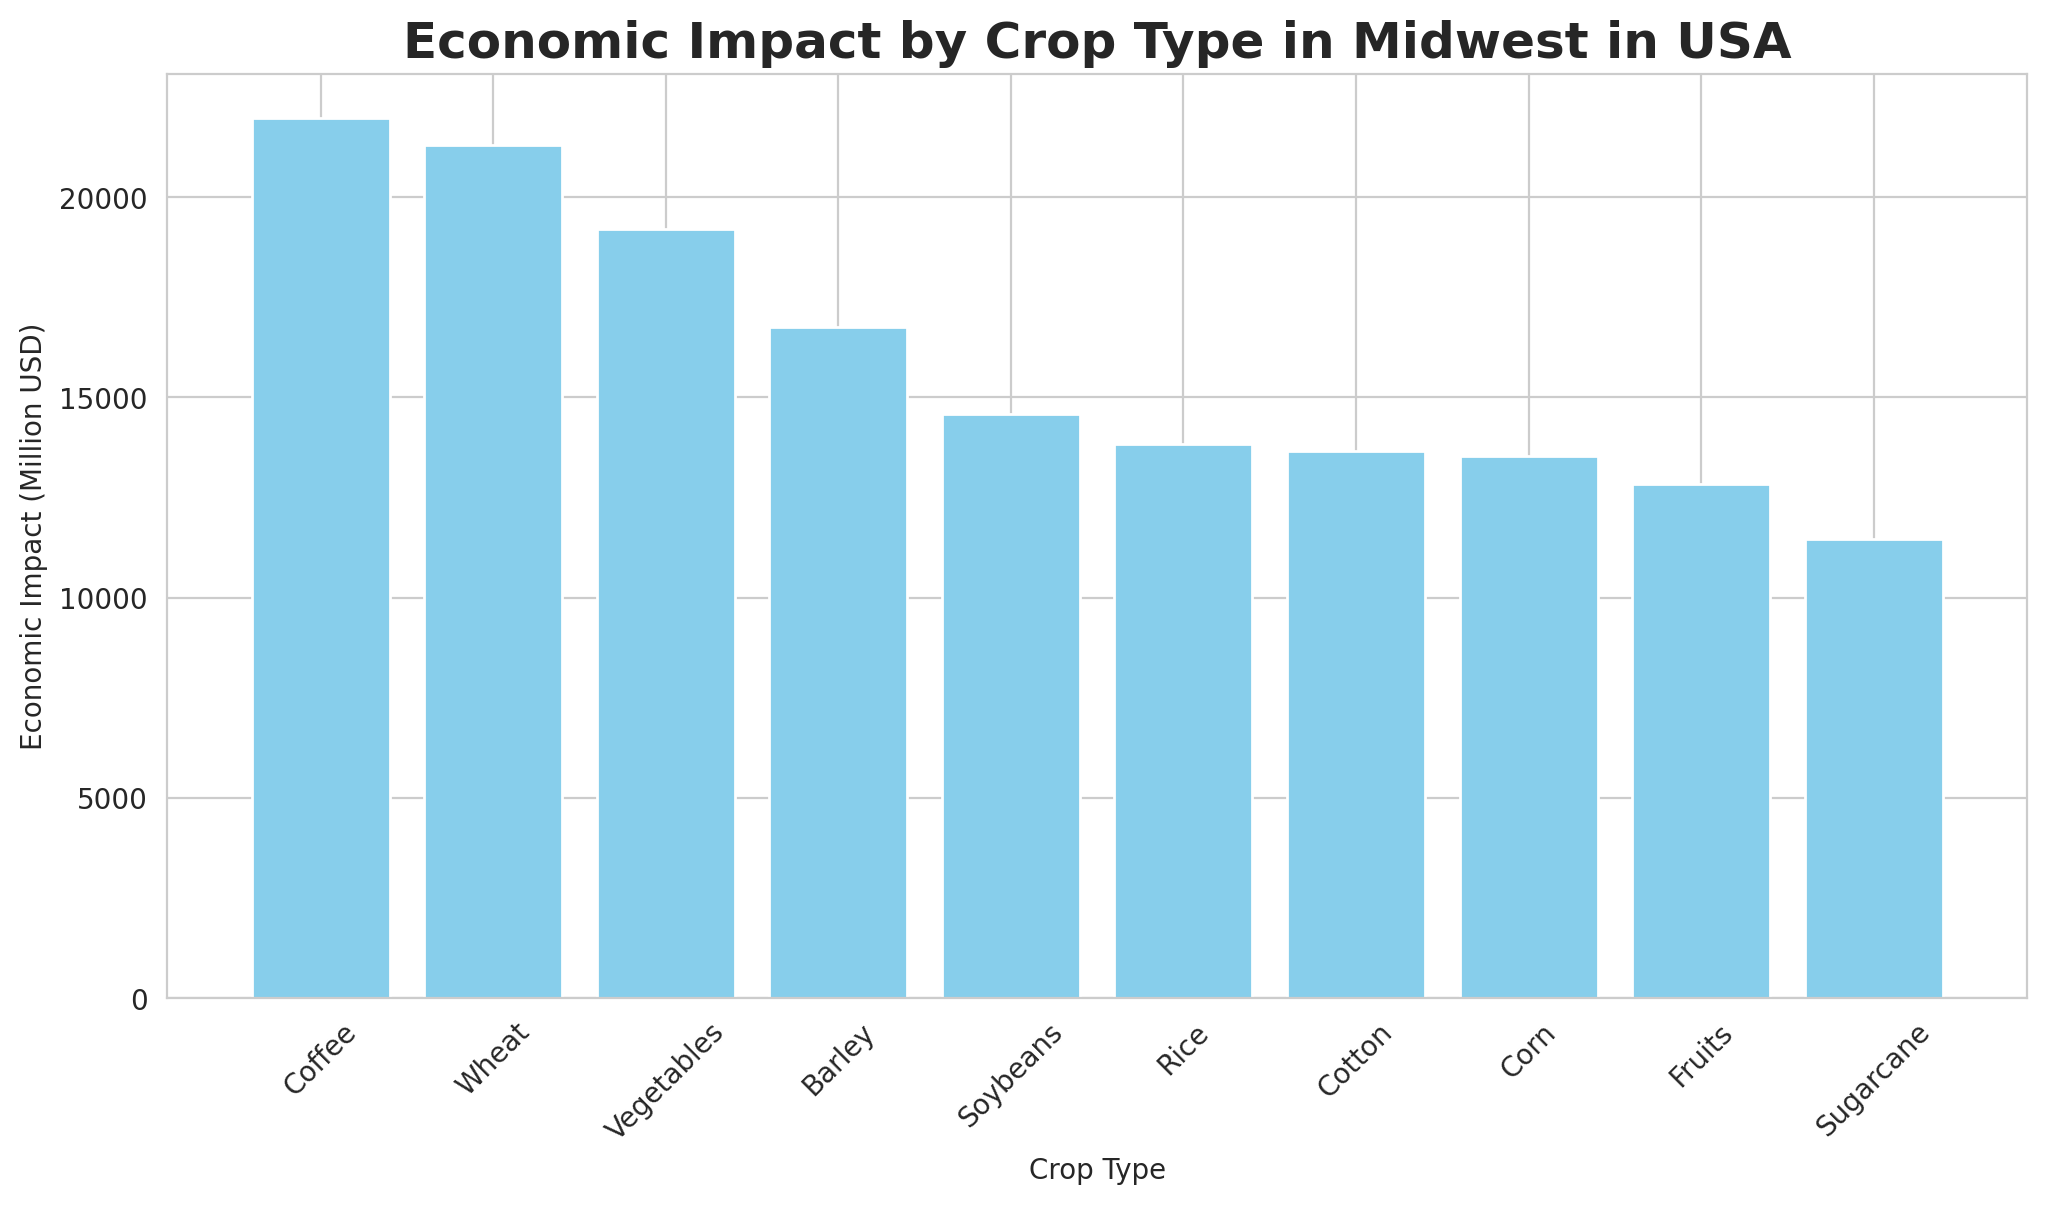

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), dpi=200)
plt.bar(df_usa_midwest_highest_impact.index, df_usa_midwest_highest_impact.values, color='skyblue')
plt.xlabel('Crop Type')
plt.ylabel('Economic Impact (Million USD)')
plt.title('Economic Impact by Crop Type in Midwest in USA', fontdict={'fontsize': 18,'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.show()

In [ ]:
j= df_usa_midwest.groupby('Crop_Type')['Economic_Impact_Million_USD'].sum().idxmax()


In [ ]:
print(f'The Crop Type with the highest Economic Impact in Midwest in USA is {j}')

The Crop Type with the highest Economic Impact in Midwest in USA is Coffee


# Q6) Yearly Average Precipitation in Australia

In [ ]:
df_aus = df[df['Country']=='Australia']

In [ ]:
df_aus.head()

,Date,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_Perc,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
7,2021-01-15,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-resistant Crops,1367.97
20,2000-01-15,Australia,New South Wales,Rice,30.08,1641.99,15.83,3.096,2,94.75,13.70,42.84,73.56,Organic Farming,345.85
23,2010-01-15,Australia,Victoria,Coffee,20.85,2294.81,8.66,2.820,3,39.88,29.31,79.91,59.92,Drought-resistant Crops,1222.94
29,1997-01-15,Australia,Victoria,Wheat,31.67,2364.58,13.16,3.330,4,72.38,48.77,12.25,94.46,Drought-resistant Crops,1244.49
40,2020-01-15,Australia,Western Australia,Sugarcane,17.77,1743.11,13.69,1.690,2,23.95,39.15,67.61,42.34,Water Management,440.49


In [ ]:
df_aus[['Date','Total_Precipitation_mm']].sort_values(by='Date')

,Date,Total_Precipitation_mm
9237,1990-01-15,232.69
472,1990-01-15,792.95
9792,1990-01-15,1626.77
2999,1990-01-15,229.38
519,1990-01-15,1794.74
...,...,...
7063,2024-01-15,604.40
7044,2024-01-15,870.49
4558,2024-01-15,1361.30
8322,2024-01-15,1413.98


In [ ]:
df_aus_yearly_avg_prec= df_aus.groupby(df_aus['Date'].dt.year)['Total_Precipitation_mm'].mean()
df_aus_yearly_avg_prec

,Total_Precipitation_mm
Date,
1990,1507.071852
1991,1611.487200
1992,1597.907742
1993,1721.504848
1994,1736.621471
1995,1667.870385
1996,1559.578824
1997,1476.702500
1998,1292.173077


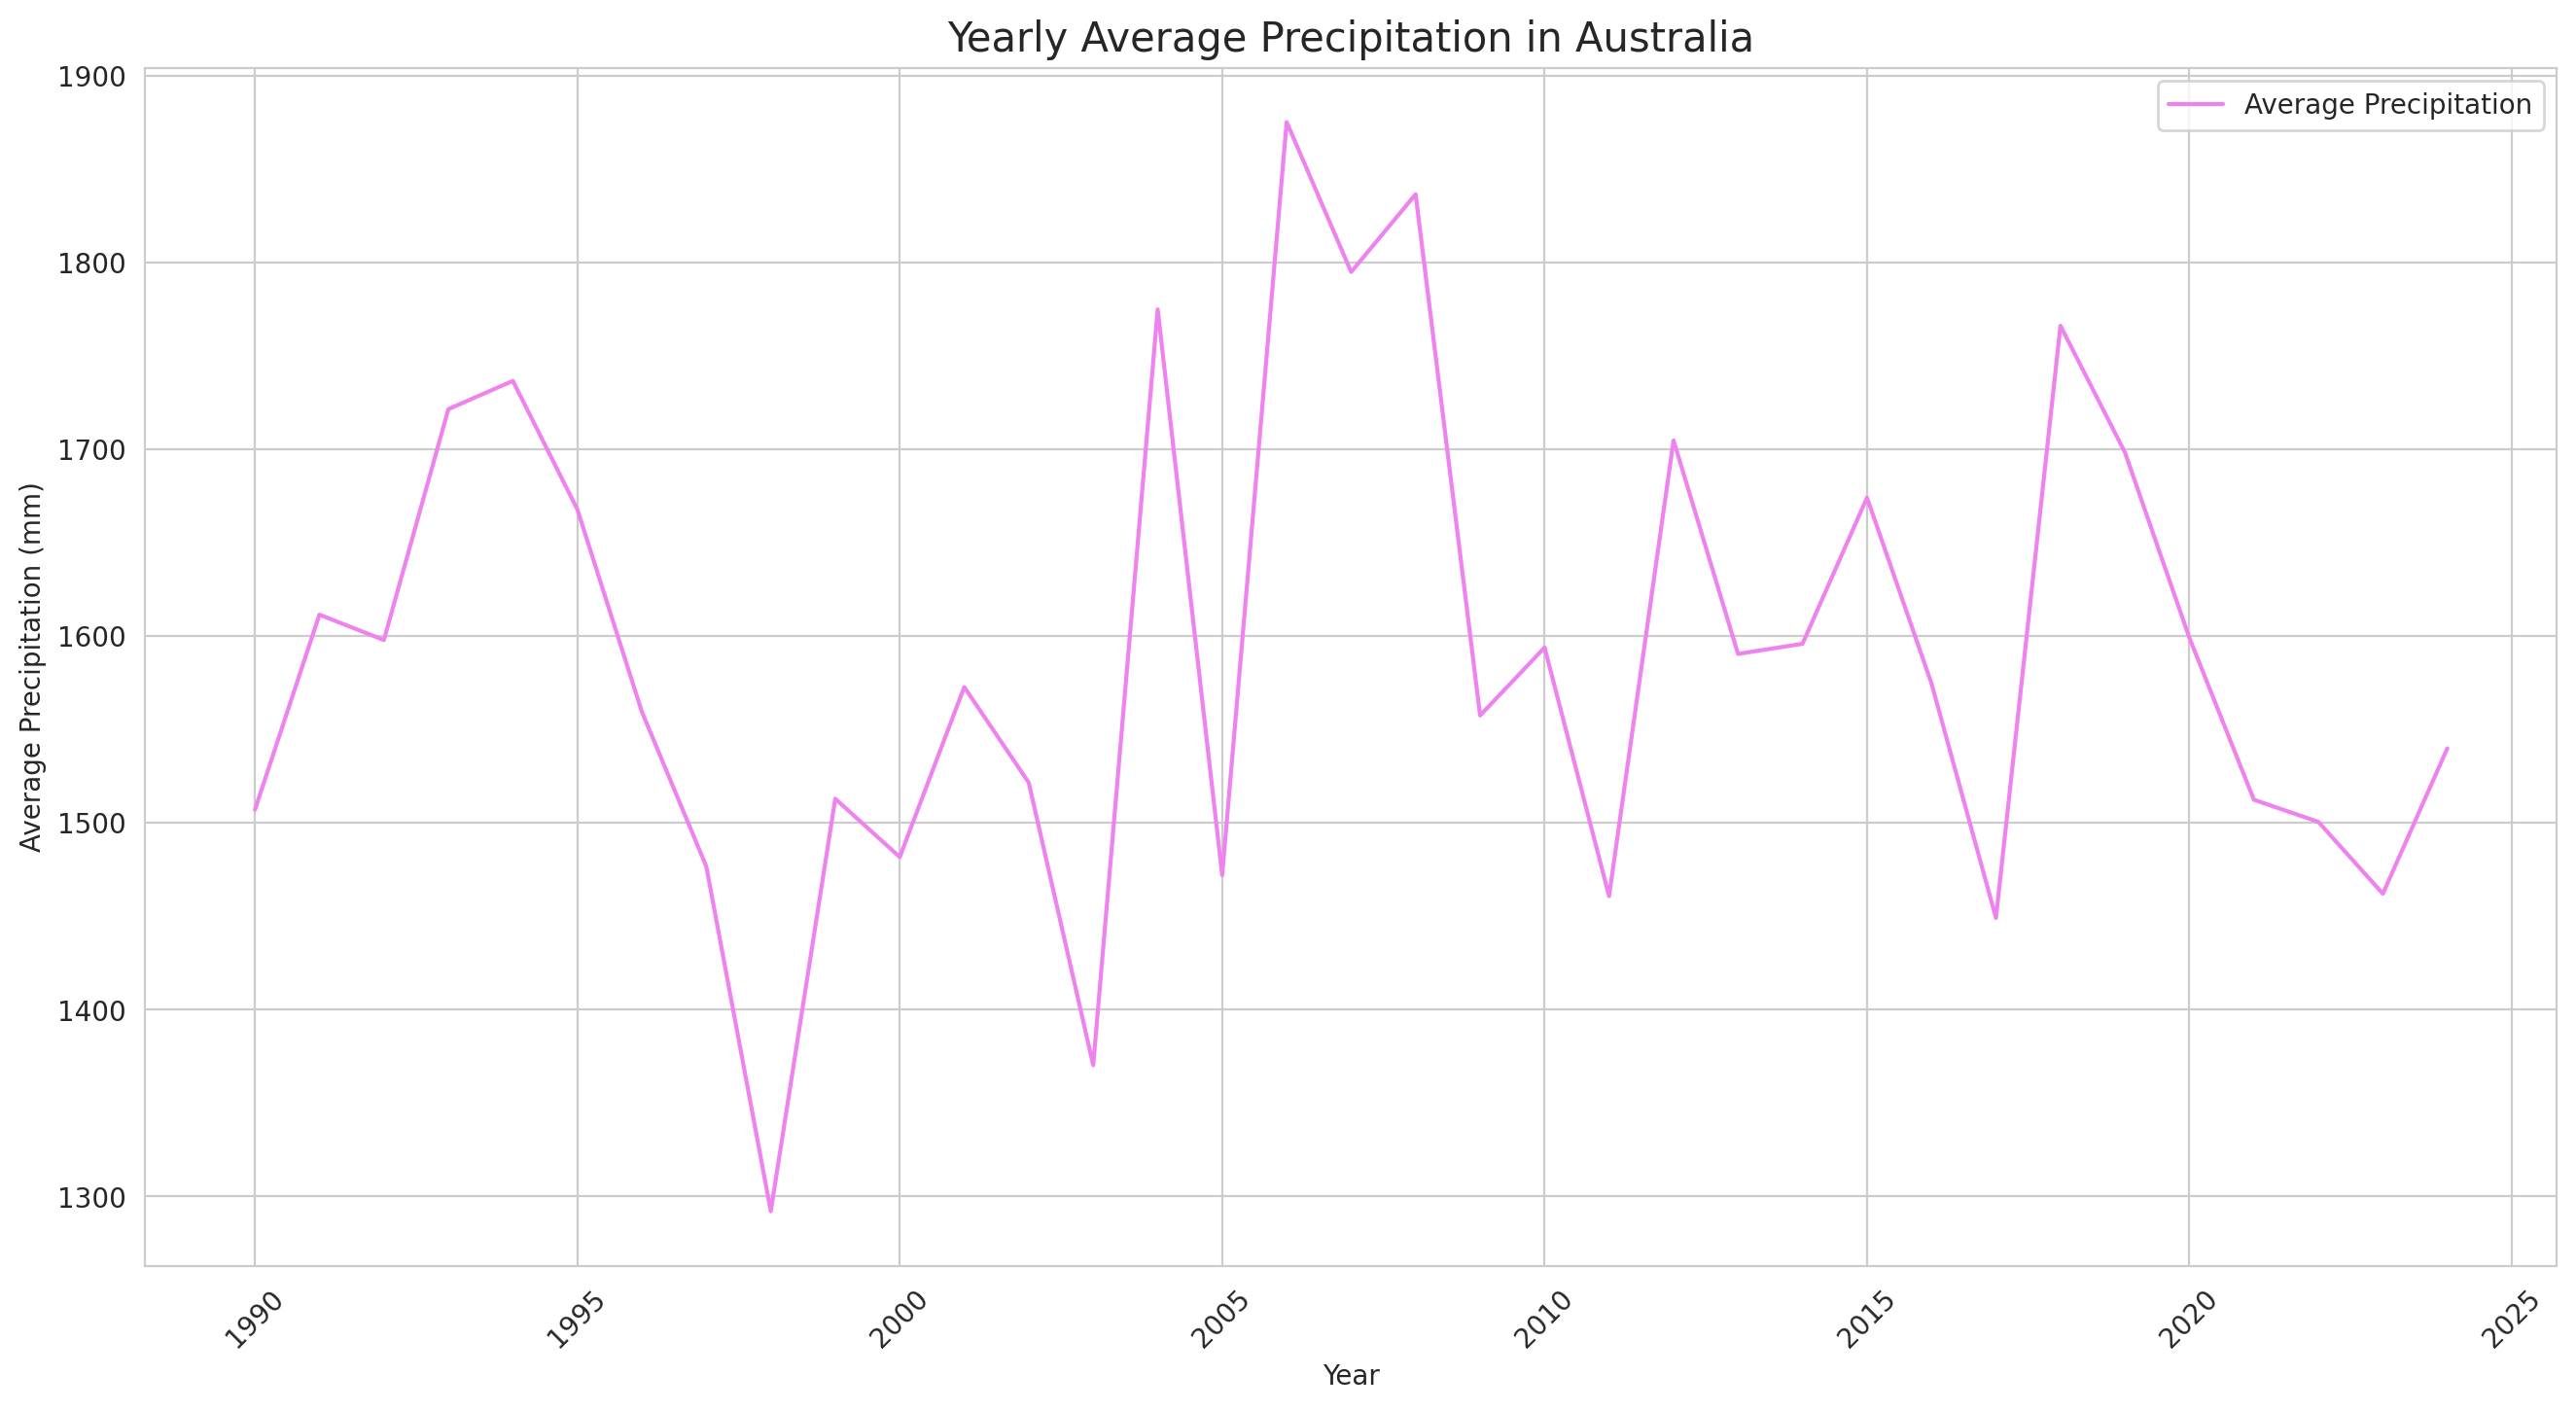

In [ ]:
plt.figure(figsize=(16, 8),dpi=200)
sns.lineplot(x=df_aus_yearly_avg_prec.index, y=df_aus_yearly_avg_prec.values, color='Violet')
plt.xticks(rotation=45)
plt.title('Yearly Average Precipitation in Australia',fontdict={'fontsize':15})
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.legend(['Average Precipitation'])
plt.grid(True)
plt.show()


# Q7) Associations Among Variables

In [ ]:
numeric_cols

Index(['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
       'Irrigation_Access_Perc', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Economic_Impact_Million_USD'],
      dtype='object')

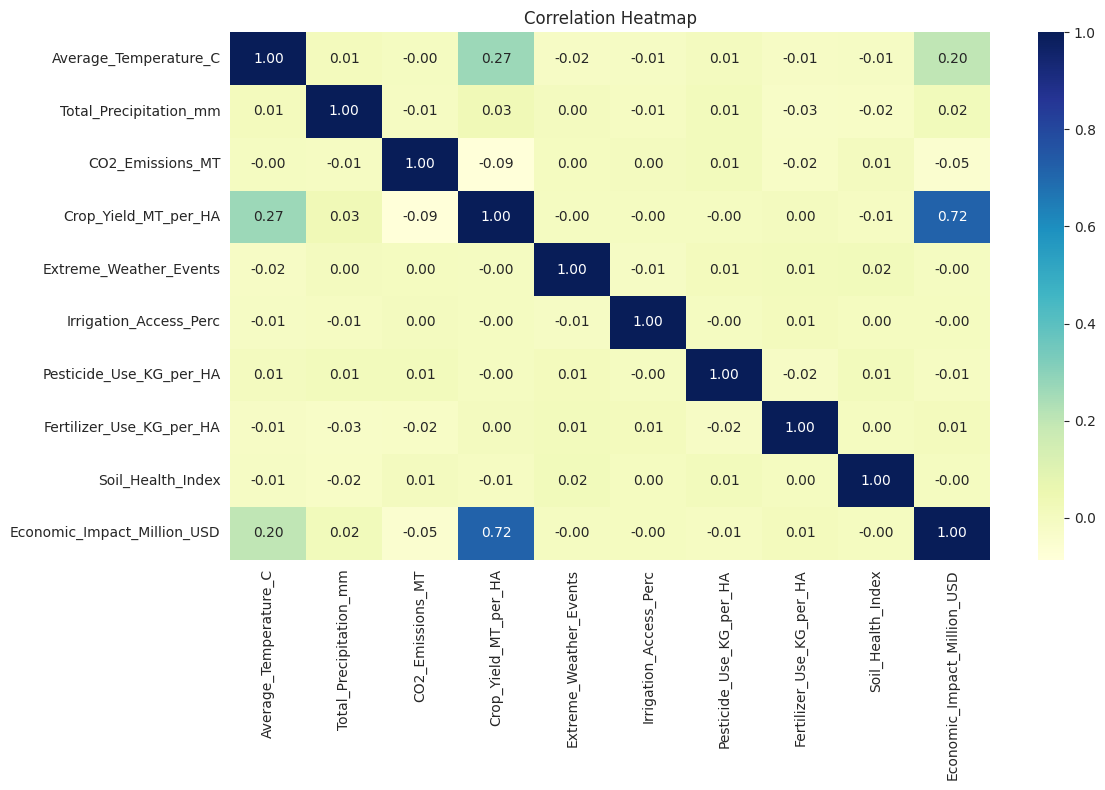

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
new_numeric_cols = numeric_cols.drop(['Crop_Yield_MT_per_HA','Irrigation_Access_Perc'])

In [ ]:
new_numeric_cols

Index(['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Extreme_Weather_Events', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [ ]:
corr_mat = df[new_numeric_cols].corr()

In [ ]:
corr_mat

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
Average_Temperature_C,1.000000,0.007400,-0.003029,-0.016961,0.005723,-0.014802,-0.010976,0.201446
Total_Precipitation_mm,0.007400,1.000000,-0.008946,0.004721,0.011179,-0.025516,-0.020286,0.019197
CO2_Emissions_MT,-0.003029,-0.008946,1.000000,0.000897,0.014655,-0.019824,0.005052,-0.051904
Extreme_Weather_Events,-0.016961,0.004721,0.000897,1.000000,0.010731,0.014614,0.016687,-0.003968
Pesticide_Use_KG_per_HA,0.005723,0.011179,0.014655,0.010731,1.000000,-0.015534,0.013561,-0.007036
Fertilizer_Use_KG_per_HA,-0.014802,-0.025516,-0.019824,0.014614,-0.015534,1.000000,0.000199,0.007780
Soil_Health_Index,-0.010976,-0.020286,0.005052,0.016687,0.013561,0.000199,1.000000,-0.001151
Economic_Impact_Million_USD,0.201446,0.019197,-0.051904,-0.003968,-0.007036,0.007780,-0.001151,1.000000


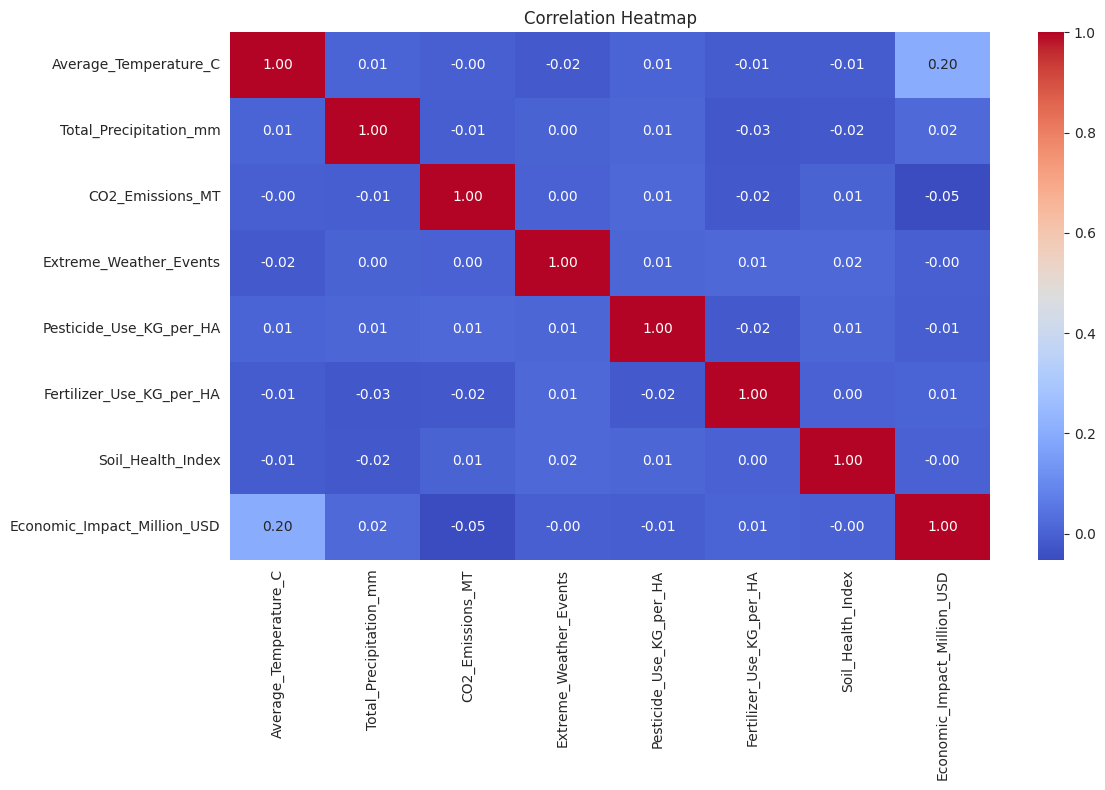

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()





Among all the associations analyzed, one stands out as more significant than the others.

*  **Association**: Average Temperature and Economic Impact

*  **Correlation Coefficient**: 0.2014

*  **Interpretation**: This shows a weak positive correlation.

*  **Conclusion**: With the rise in average temperatures, the economical impact also tends to increase. This relationship is impressive when compared with the rest of the associations that are present within the dataset.
*   **Further Analysis Needed**: More features need to be sought in order to have a better understanding of this relationship.